In [3]:
import os

# Create .kaggle directory if it doesn't exist
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move kaggle.json to the .kaggle directory
!mv /content/kaggle.json /root/.kaggle/kaggle.json

# Set permissions for kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

print("Kaggle initialization complete.")

Kaggle initialization complete.


In [4]:
#!/bin/bash
!kaggle datasets download ahemateja19bec1025/traffic-sign-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification
License(s): CC0-1.0
 80% 152M/190M [00:00<00:00, 1.58GB/s]
100% 190M/190M [00:00<00:00, 1.26GB/s]


In [5]:
# unzip the data
!unzip /content/traffic-sign-dataset-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: traffic_Data/DATA/24/024_1_0040.png  
  inflating: traffic_Data/DATA/24/024_1_0041.png  
  inflating: traffic_Data/DATA/24/024_1_0042.png  
  inflating: traffic_Data/DATA/24/024_1_0043.png  
  inflating: traffic_Data/DATA/24/024_1_0044.png  
  inflating: traffic_Data/DATA/24/024_1_0045.png  
  inflating: traffic_Data/DATA/24/024_1_0046.png  
  inflating: traffic_Data/DATA/24/024_1_0047.png  
  inflating: traffic_Data/DATA/24/024_1_0048.png  
  inflating: traffic_Data/DATA/24/024_1_0049.png  
  inflating: traffic_Data/DATA/25/025_0001.png  
  inflating: traffic_Data/DATA/25/025_1_0001.png  
  inflating: traffic_Data/DATA/26/026_0001.png  
  inflating: traffic_Data/DATA/26/026_0002.png  
  inflating: traffic_Data/DATA/26/026_0003.png  
  inflating: traffic_Data/DATA/26/026_0004.png  
  inflating: traffic_Data/DATA/26/026_0005.png  
  inflating: traffic_Data/DATA/26/026_0006.png  
  inflating: traffic_Data/DATA/26/026_0007.pn

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [8]:
train_folder='/content/traffic_Data/DATA'
test_folder='/content/traffic_Data/TEST'
classes=pd.read_csv('labels.csv')
classSize=len(classes)
print(classSize)

58


In [11]:
traffic_data = []
labels = []

def fetch_image(traffic_data, labels):
    for classValue in os.listdir(train_folder):
        classPath=os.path.join(train_folder,classValue)
        labels.append(classValue)
        for trafficSignal in os.listdir(classPath):
            imgTrafficSignal=Image.open(os.path.join(classPath,trafficSignal))
            imgTrafficSignal = imgTrafficSignal.convert("L")
            imgTrafficSignal = imgTrafficSignal.resize((90,90))
            imgTrafficSignal = np.array(imgTrafficSignal)
            traffic_data.append((imgTrafficSignal,[int(classValue)]))

    labels=np.array(labels)
    return traffic_data,labels

In [12]:
traffic_data, labels = fetch_image(traffic_data, labels)
traffic_data_features, traffic_data_labels = zip(*traffic_data)
training_data_features, validation_data_features, training_data_labels, validation_data_labels = train_test_split(traffic_data_features, traffic_data_labels, test_size=0.33, random_state=42)
training_data_features = np.array(training_data_features)
training_data_labels = np.array(training_data_labels)
validation_data_features = np.array(validation_data_features)
validation_data_labels = np.array(validation_data_labels)

In [14]:
training_data_features = training_data_features.astype('float32') / 255.0
validation_data_features = validation_data_features.astype('float32') / 255.0

training_data_features = np.expand_dims(training_data_features, axis=-1)
validation_data_features = np.expand_dims(validation_data_features, axis=-1)

print("Shape of training_data_features after normalization and reshaping:", training_data_features.shape)
print("Shape of validation_data_features after normalization and reshaping:", validation_data_features.shape)

Shape of training_data_features after normalization and reshaping: (2793, 90, 90, 1)
Shape of validation_data_features after normalization and reshaping: (1377, 90, 90, 1)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)
print("ImageDataGenerator configured.")

ImageDataGenerator configured.


In [23]:
cnnModel = Sequential()
cnnModel.add(Conv2D(16,(3,3), padding="same", input_shape=(90, 90, 1), activation='relu'))
cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
cnnModel.add(Dropout(0.25)) # Dropout after first pooling layer
cnnModel.add(Conv2D(32,(3,3), padding="same", activation='relu'))
cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
cnnModel.add(Dropout(0.25)) # Dropout after second pooling layer
cnnModel.add(Conv2D(64,(5,5), padding="same", activation='relu'))
cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
cnnModel.add(Dropout(0.25)) # Dropout after third pooling layer
cnnModel.add(Conv2D(128,(7,7), padding="same", activation='relu'))
cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
cnnModel.add(Dropout(0.25)) # Dropout after fourth pooling layer
cnnModel.add(Flatten())
cnnModel.add(Dropout(0.5)) # Dropout after Flatten layer
cnnModel.add(Dense(232, activation='relu'))
cnnModel.add(Dense(116, activation='relu'))
cnnModel.add(Dense(classSize, activation='softmax')) # Using classSize for the output layer
print("CNN model with Dropout layers defined.")

CNN model with Dropout layers defined.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnnModel.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

trafficSignNetwork = cnnModel.fit(
    data_generator.flow(training_data_features, training_data_labels, batch_size=14),
    epochs=12,
    validation_data=(validation_data_features, validation_data_labels)
)

Epoch 1/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.0812 - loss: 3.7598 - val_accuracy: 0.0966 - val_loss: 3.6097
Epoch 2/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1199 - loss: 3.5267 - val_accuracy: 0.2062 - val_loss: 3.2484
Epoch 3/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2291 - loss: 3.0893 - val_accuracy: 0.3333 - val_loss: 2.4355
Epoch 4/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3913 - loss: 2.2749 - val_accuracy: 0.5911 - val_loss: 1.4358
Epoch 5/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5034 - loss: 1.7136 - val_accuracy: 0.6369 - val_loss: 1.1574
Epoch 6/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5542 - loss: 1.4696 - val_accuracy: 0.6957 - val_loss: 0.8851
Epoch 7/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6222 - loss: 1.2488 - val_accuracy: 0.7567 - val_loss: 0.8400
Epoch 8/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6539 - loss: 1.1288 - val_acc

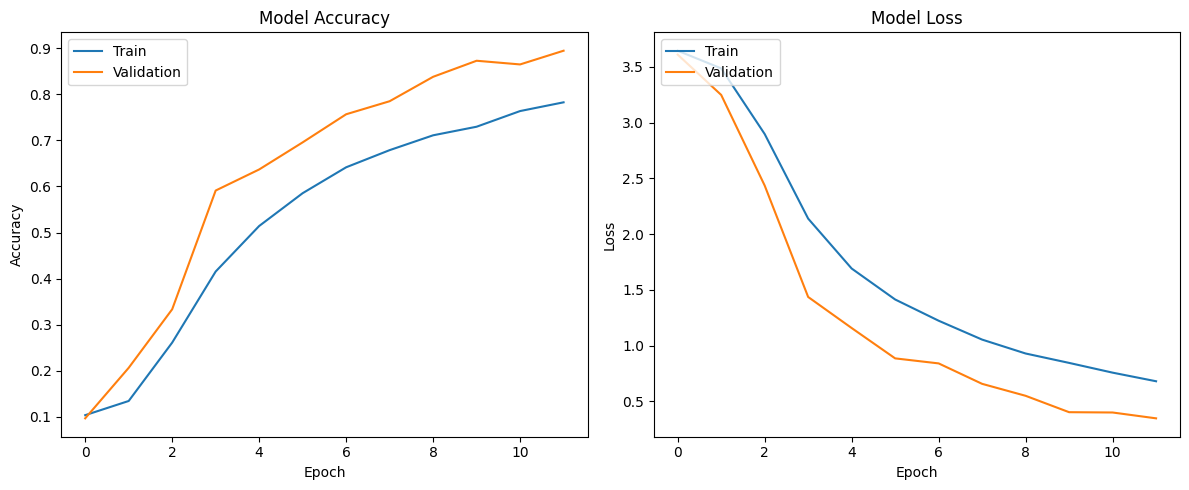

In [25]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(trafficSignNetwork.history['accuracy'])
plt.plot(trafficSignNetwork.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(trafficSignNetwork.history['loss'])
plt.plot(trafficSignNetwork.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [26]:
# write a function that takes path of image and predict result using model
def predict_image(image_path):
    img = Image.open(image_path)
    img = img.convert('L')
    img = img.resize((90, 90))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1) # Add channel dimension
    img_array = img_array.astype('float32') / 255.0 # Convert to float32 and normalize

    predictions = cnnModel.predict(img_array)
    predicted_class_id = np.argmax(predictions, axis=1)[0]
    predicted_class_name = classes['Name'][predicted_class_id]

    return predicted_class_name

In [32]:
predict_image('/content/download.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


'Speed limit (5km/h)'